## Prática I (30-Mar-2023)

Grupo:

Gabriel Bortoli - 5378290

Lucas Maretti - 6789752

--------------------------------------

Dataset escolhido: Wine

Descrição:
178 registros
13 atributos contínuos
3 classes alvo

--------------------------------------

Informações (extraídas de pesquisas na internet):

* Alcohol: teor alcólico do vinho;
* Malic Acid: substância azeda e adstringente, serve para preservar o dulçor de alimentos e ajustar o pH;
* Ash: produto restante depois da queima dos resíduos que sobram após a evaporação do vinho;
* Alcalinity of ash: análise da alcalinidade (pH > 7) das cinzas;
* Magnesium: extraído pela videira do solo,  pode indicar o terroir do produto;
* Total Phenols: encontrados nas cascas e sementes de uvas e contribuem para as características do vinho como a estabilidade de cor, a adstringência e propriedades sensoriais;
* Flavanoids: responsável pela pigmentação de plantas;
* Nonflavanoid Phenols: fenóis dentre os quais estão alguns que podem vir de carvalhos, usados na maturação do vinho;
* Proanthocyanins: tipo de polifenol muito presente em sementes de uvas;
* Color Intensity: muito ligado a presença do pigmento anthocyanin (variam geralmente entre vermelho, violeta/rubi e azul/roxo);
* Hue: a tonalidade/matiz também ligada à cor;
--- Em geral: vermelho está associado a vinhos mais ácidos, com pH < 3.4, violeta entre 3.4 e 3.6 e azulados/magenta acima de 3.6;
* OD280/OD315 of diluted wines: determina a concentração de proteínas;
* Proline: aminoáciado mais encontrado em vinhos.

--------------------------------------

Atividades:

1- Baseado na descrição do conjunto de dados formule algumas hipótese, perguntas que você acha que podem ser respondidas/entendidas com este conjunto de dados. Tente formular até 3 questões. Numere cada questão.

- a.) Há relação entre os flavonóides e intensidade de cor e tonalidade?
- b.) Qual é a relação entre as concentrações de proteínas e de aminoácidos (OD280/OD315 x Proline)? Essas características estão relacionadas entre si e com a quantidade de magnésio (que pode ser formado através de alguns tipos de aminoácidos)?
- c.) O ácido málico e a alcalinidade das cinzas, muito relacionados ao pH, estão correlacionados entre si?

2- Escolha 3 atributos que você acha representar bem o problema e faça uma análise dos tipos de atributos (calcule a matriz de correlação). Justifique a escolha desses atributos no contexto do conjunto de dados e com relação às hipótese/questões levantadas na pergunta 1.

3 - Exiba o mapa de calor (heatmap) correspondente da matriz de correlação.

4 - Faça uma análise exploratória com as medidas vistas em aula (média, mediana, moda, obliquidade e kurtose) nos atributos anteriormente selecionados. Explique quais medidas ajudam no entendimento do conjunto de dados. Sinta-se livre para utilizar outras medidas, mas explique porque você está usando elas. Se achar necessário, pode utilizar mais atributos na análise.

5 - Exiba o histograma correspondente a cada um dos atributos escolhidos.

6 - Faça o boxplot correspondente a cada um dos atributos escolhidos.

7 - Detectar se existem outliers. Se existirem, quais são eles?

8 - Após a análise exploratória reanalise as hipóteses/questões e comente se elas já podem ser respondidas, se elas não fazem mais sentido, eventualmente se elas podem ser reformuladas para questões

In [77]:
# Imports de bibliotecas utilizadas

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt

In [78]:
# Leitura do dataset escolhido

wine = datasets.load_wine()
wine = pd.DataFrame(data= np.c_[wine['data'], wine['target']],
                     columns= wine['feature_names'] + ['target'])

wine.head(3)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0


1.)

A primeira questão levantada foi:

a.) Há relação entre os flavonóides e intensidade de cor e tonalidade?

Para isso fazemos a matriz de correlação entre essas 3 variáveis:

Pelos resultados, vemos que há uma correlação (inversa) entre intensidade de cor e matiz (o que é esperado, já que são conceitos próximos) e uma correlação um pouco mais pungente em relação a matiz e flavonoides que, ao contrário do imaginado previamente, não tem uma correlação muito significativa com a intensidade de cor. Podemos dizer que a presença de flavonoides, responsáveis pela pigmentação da casca da uva, está relacionado à tonalidade, embora não esteja ligado a intensidade de cor.

<AxesSubplot: >

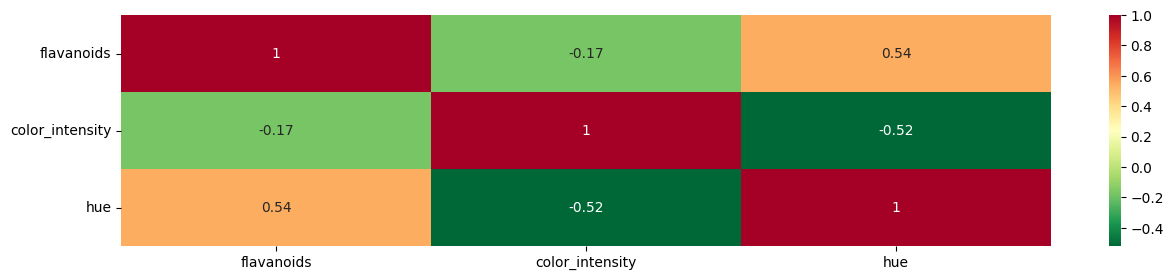

In [79]:
corr = wine[['flavanoids', 'color_intensity', 'hue']].corr()
sns.heatmap(data= corr, annot= True, cmap= 'RdYlGn_r')

Na segunda questão, temos:

b.) Qual é a relação entre as concentrações de proteínas e de aminoácidos (OD280/OD315 x Proline)? Essas características estão relacionadas entre si e com a quantidade de magnésio (que pode ser formado através de alguns tipos de aminoácidos)?

Para isso fazemos a matriz de correlação entre essas 3 outras variáveis:

A matriz gerada mostra que praticamente não há relação entre o magnésio e as proteínas, mas há alguma relação entre o magnésio e aminoácidos. E também alguma relação entre proteínas e aminoácidos. Ainda assim, os valores são baixos (abaixo de 0.40).

<AxesSubplot: >

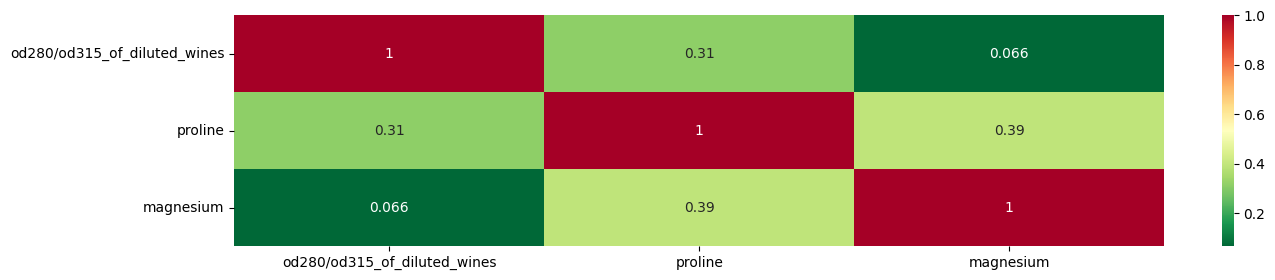

In [80]:
corr = wine[['od280/od315_of_diluted_wines', 'proline', 'magnesium']].corr()
sns.heatmap(data= corr, annot= True, cmap= 'RdYlGn_r')

A terceira questão propõe:

c.) O ácido málico e a alcalinidade das cinzas, muito relacionados ao pH, estão correlacionados entre si?

Também usamos a matriz de correlação entre as 3 outras variáveis:

Os resultados mostram valores baixos, sendo que a correlação que mais salta aos olhos é entre a quantidade de cinzas e sua alcalinidade.

<AxesSubplot: >

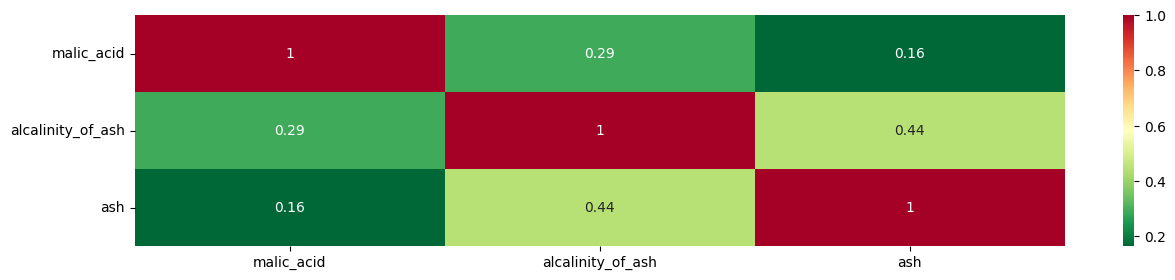

In [81]:
corr = wine[['malic_acid', 'alcalinity_of_ash', 'ash']].corr()
sns.heatmap(data= corr, annot= True, cmap= 'RdYlGn_r')

2.) e 3.)

Portanto, afim de analisar relações que tenham uma correlação maior entre si, plotamos o mapa de calor de todas os atributos entre si, onde foi possível chegar a algumas novas observações em relação aos dados:

- O teor alcólico tem relações com a intensidade de cor e presença de aminoácidos (proline) (0.55 e 0.64, respectivamente);
- O ácido málico se relaciona inversamente com a matiz de tonalidades (-0.56);
- O total de fenóis, presença de flavonoides, presença de proanthocyanins e proteínas estão bastante relacionados entre si, com correlações variando de 0.61 a 0.86 (fenois totais x flavonoides). E essas relações são inversamente proporcionais em relação a quantidade de fenois não flavonoides;
- A matiz de cores tem relações observáveis com ácido málico (-0.50), flavonoides (0.54), intensidade de cor (-0.52) e presença de proteínas (0.57).

<AxesSubplot: >

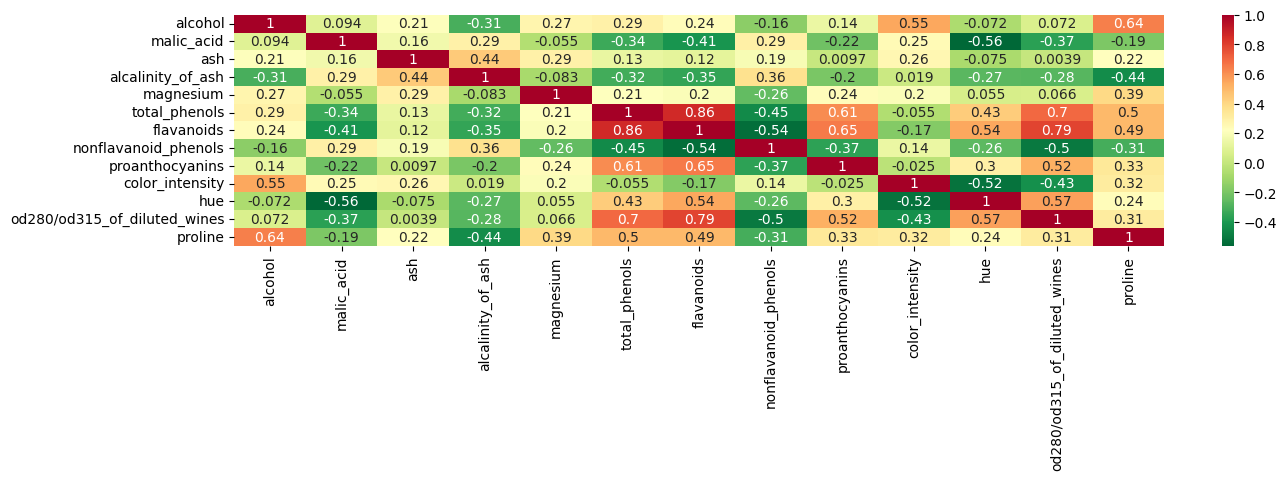

In [82]:
corr = wine.drop('target', axis= 1).corr()
sns.heatmap(data= corr, annot= True, cmap= 'RdYlGn_r')

4.)

Para a análise exploratória, começamos com a descrição do dataset, que já fornece muitas informações importantes e de fácil visualização, uma vez que todos os 13 atributos são dados contínuos.

In [83]:
# Informações sobre o dataset

wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Sabendo que há 3 classes distintas (vinhos produzidos em 3 regiões diferentes), é interessante observar as medidas para cada uma das classes separadamente.

Além disso, afim de focar um pouco a análise, iremos trabalhar apenas com os 4 atributos onde observamos haver uma maior correlação (total_phenols, flavanoids, proanthocyanins, od280/od315_of_diluted_wines - cujo nome foi alterado para proteins) e ignorar, por ora, os quartis.

Afim de facilitar a visualização do que falamos anteriormente, vamos voltar a ver o mapa de calor da matriz de correlação, porém restrito aos 4 atributos escolhidos:

In [84]:
wine2 = wine[['total_phenols', 'flavanoids', 'proanthocyanins', 'od280/od315_of_diluted_wines', 'target']]
wine2 = wine2.rename(columns = {'od280/od315_of_diluted_wines': 'proteins'})

for t in wine2.target.unique():
    print(wine2[wine2.target == t].describe().loc[['count', 'mean', 'std', 'min', '50%', 'max']],'\n\n')

       total_phenols  flavanoids  proanthocyanins   proteins  target
count      59.000000   59.000000        59.000000  59.000000    59.0
mean        2.840169    2.982373         1.899322   3.157797     0.0
std         0.338961    0.397494         0.412109   0.357077     0.0
min         2.200000    2.190000         1.250000   2.510000     0.0
50%         2.800000    2.980000         1.870000   3.170000     0.0
max         3.880000    3.930000         2.960000   4.000000     0.0 


       total_phenols  flavanoids  proanthocyanins   proteins  target
count      71.000000   71.000000        71.000000  71.000000    71.0
mean        2.258873    2.080845         1.630282   2.785352     1.0
std         0.545361    0.705701         0.602068   0.496573     0.0
min         1.100000    0.570000         0.410000   1.590000     1.0
50%         2.200000    2.030000         1.610000   2.830000     1.0
max         3.520000    5.080000         3.580000   3.690000     1.0 


       total_phenols  flavan

In [85]:
for m in [0,1,2]:
    print('A moda da classe ', m, ' é:\n',wine2[wine2.target == m].mode(),'\n\n')

A moda da classe  0  é:
    total_phenols  flavanoids  proanthocyanins  proteins  target
0            3.0        2.68             1.66       3.0     0.0
1            NaN         NaN             1.98       NaN     NaN 


A moda da classe  1  é:
    total_phenols  flavanoids  proanthocyanins  proteins  target
0            2.2        2.03             1.35      2.78     1.0
1            NaN        2.65              NaN      2.96     NaN 


A moda da classe  2  é:
    total_phenols  flavanoids  proanthocyanins  proteins  target
0           1.48        0.58             0.94      1.33     2.0
1           1.70        0.60             1.14      1.56     NaN
2           1.80         NaN             1.25      1.75     NaN 




<AxesSubplot: >

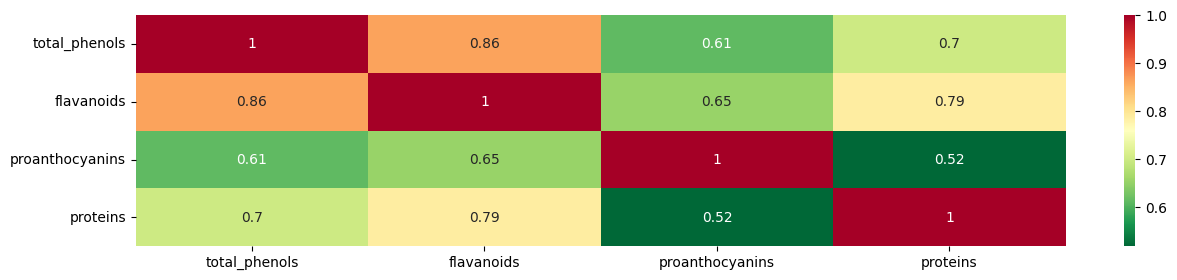

In [86]:
corr2 = wine2.drop('target', axis= 1).corr()
sns.heatmap(data= corr2, annot=True, cmap='RdYlGn_r')

Observando a média e o desvio padrão para as 3 categorias dos atributos 'flavanoids' e 'proteins', vê-se que há uma boa chance de serem usados visualmente para separar as categorias. Afim de validar a hipótese, usamos um Scatter plot, onde de fato vemos que as amostras estão bem distribuídas, especialmente para uma das categorias e é possível separá-la das outras duas:

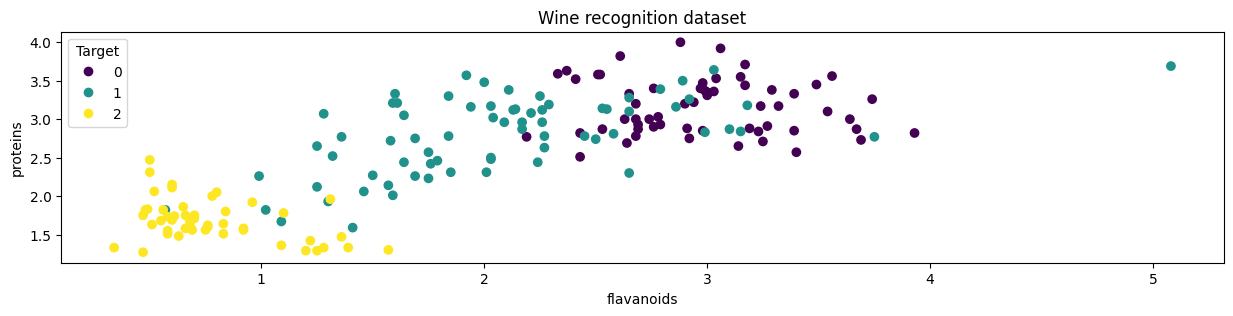

In [87]:
scatter = plt.scatter(wine2['flavanoids'], wine2['proteins'], c= wine['target'])
plt.title('Wine recognition dataset')
plt.xlabel('flavanoids')
plt.ylabel('proteins')
plt.legend(handles= scatter.legend_elements()[0], title="Target", labels= [0,1,2])
plt.show()

5.)

Apresentando os histogramas para cada um dos 4 atributos selecionados:

array([[<AxesSubplot: title={'center': 'total_phenols'}>,
        <AxesSubplot: title={'center': 'flavanoids'}>],
       [<AxesSubplot: title={'center': 'proanthocyanins'}>,
        <AxesSubplot: title={'center': 'proteins'}>]], dtype=object)

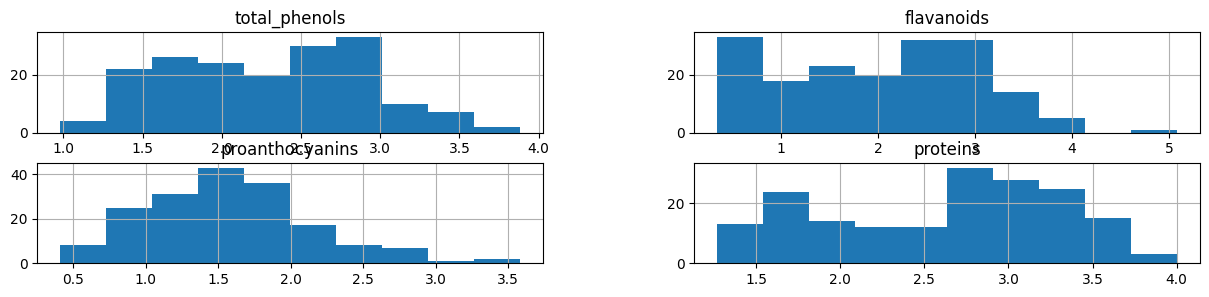

In [88]:
wine2.drop('target', axis= 1).hist()

6.) e 7.)

Agora veremos os boxplot para cada um dos 4 atributos escolhidos, separados pelas 3 classes, para efeito de comparação.
É possível notar que para os 4 atributos há outliers, em geral para maiores valores (com exceção de proanthocyanins para a classe 1, onde há um outlier abaixo do valor):

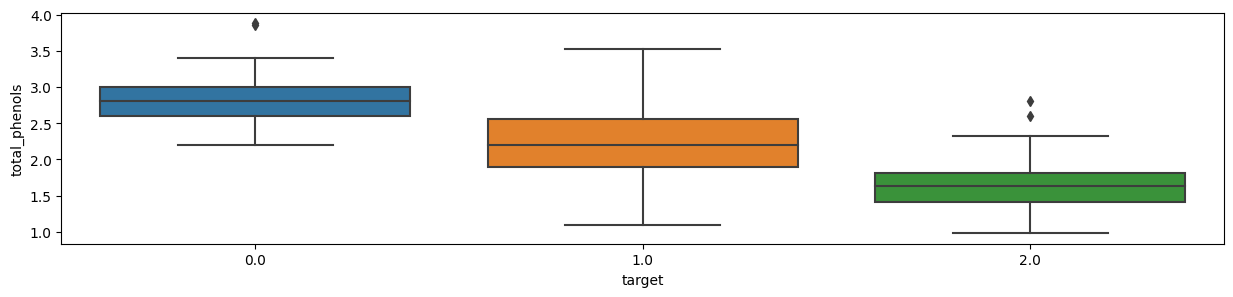

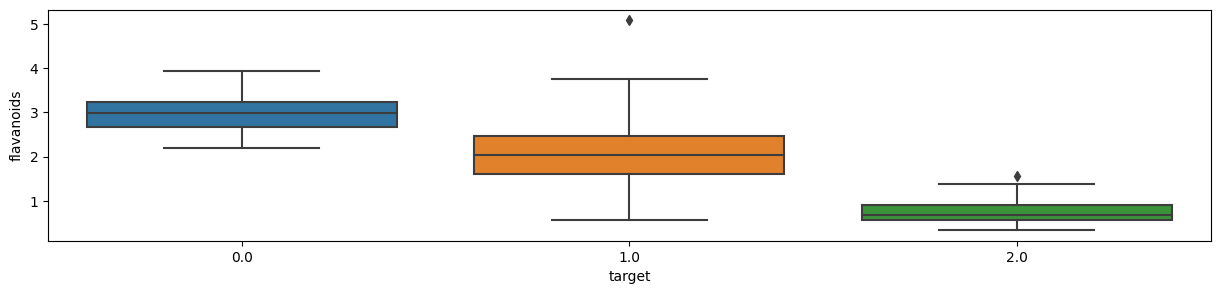

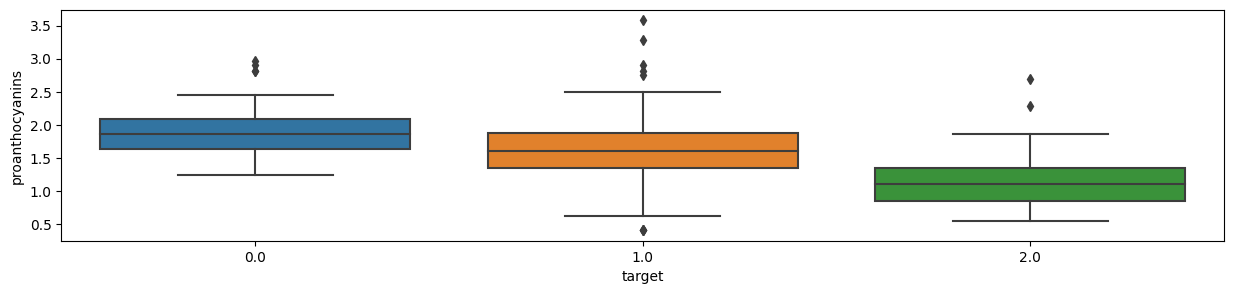

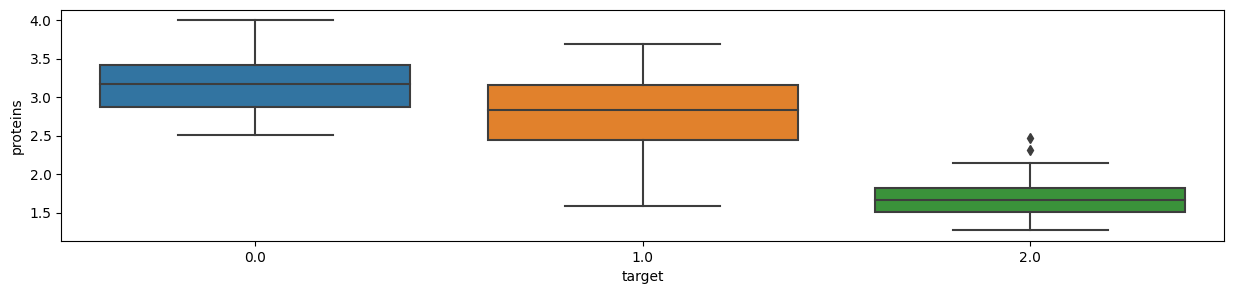

In [89]:
sns.boxplot(data= wine2, x= 'target', y= 'total_phenols')
plt.show()

sns.boxplot(data= wine2, x= 'target', y= 'flavanoids')
plt.show()

sns.boxplot(data= wine2, x= 'target', y= 'proanthocyanins')
plt.show()

sns.boxplot(data= wine2, x= 'target', y= 'proteins')
plt.show()

8.)  Após a análise exploratória reanalise as hipóteses/questões e comente se elas já podem ser respondidas, se elas não fazem mais sentido, eventualmente se elas podem ser reformuladas para questões.


Depois de analisar os dados e ver a correlação entre os atributos, foi possível identificar que as hipóteses iniciais geradas não contavam com muito suporte nas análises, tendo correlações fracas.
Com isso, uma análise mais ampla foi feita, para identificar onde havia correlações mais fortes e, a partir disso, traçar comparativos entre os atributos relacionados, explicando/entendendo melhor seus valores.

In [90]:
# # Code to use file in colab:

# from google.colab import drive
# drive.mount('/content/drive')

Dataset escolhido: Microdados Censo 2014 - Cursos

In [91]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,3)

In [92]:
# Considering that the file is in the same directory as the notebook:
# /SCC5948_MAI5024_2023/datasets/microdados_censo_superior_2014/2014/DADOS/DM_CURSO.CSV

curso = pd.read_csv(
        'DM_CURSO.CSV', 
        sep='|', header=0, encoding='latin1')
curso.head()

,CO_IES,NO_IES,CO_CATEGORIA_ADMINISTRATIVA,DS_CATEGORIA_ADMINISTRATIVA,CO_ORGANIZACAO_ACADEMICA,DS_ORGANIZACAO_ACADEMICA,CO_MUNICIPIO_CURSO,NO_MUNICIPIO_CURSO,CO_UF_CURSO,SGL_UF_CURSO,...,QT_VAGAS_REMANESC_EAD,QT_VAGAS_PROG_ESP_INTEGRAL,QT_VAGAS_PROG_ESP_MATUTINO,QT_VAGAS_PROG_ESP_VESPERTINO,QT_VAGAS_PROG_ESP_NOTURNO,QT_VAGAS_PROG_ESP_EAD,QT_MATRICULA_CURSO,QT_CONCLUINTE_CURSO,QT_INGRESSO_CURSO,QT_INGRESSO_VAGAS_NOVAS
0,4251,FACULDADE PITÁGORAS DE TECNOLOGIA DE BELO HORI...,4,Privada com fins lucrativos,3,Faculdade,3106200.0,Belo Horizonte,31.0,MG,...,NaN,NaN,NaN,NaN,0.0,NaN,0,0.0,0,0
1,4251,FACULDADE PITÁGORAS DE TECNOLOGIA DE BELO HORI...,4,Privada com fins lucrativos,3,Faculdade,3106200.0,Belo Horizonte,31.0,MG,...,NaN,NaN,NaN,NaN,0.0,NaN,58,8.0,36,36
2,4251,FACULDADE PITÁGORAS DE TECNOLOGIA DE BELO HORI...,4,Privada com fins lucrativos,3,Faculdade,3106200.0,Belo Horizonte,31.0,MG,...,NaN,NaN,NaN,NaN,0.0,NaN,132,26.0,87,87
3,4251,FACULDADE PITÁGORAS DE TECNOLOGIA DE BELO HORI...,4,Privada com fins lucrativos,3,Faculdade,3106200.0,Belo Horizonte,31.0,MG,...,NaN,NaN,NaN,NaN,0.0,NaN,237,41.0,163,163
4,4255,FACULDADES INTEGRADAS DE CACOAL,5,Privada sem fins lucrativos,3,Faculdade,1100049.0,Cacoal,11.0,RO,...,NaN,NaN,NaN,NaN,0.0,NaN,131,3.0,39,27


---
---
1- Baseado na descrição do conjunto de dados formule algumas hipótese, perguntas que você acha que podem ser respondidas/entendidas com este conjunto de dados. Tente formular até 3 questões. Numere cada questão.

Nosso indicador principal de análise para a correlação será a quantidade de alunos concluintes nos cursos. Para tanto nossa primeira pergunta será:

    1. É possível encontrar algum fator que se correlacione com a quantidade de concluintes do curso?;

Além disso, vamos utilizar a EDA para entender como era o cenário da educação em 2014 em outros aspectos como:

    2. Qual tipo de modalidade de ensino (Presencial ou à distância) é mais comum?
    3. Quais tipos de organização acadêmica tem mais matrículas?
    

---
---
2- Escolha 3 atributos que você acha representar bem o problema e faça uma análise dos tipos de atributos e quais operações fazem sentido para cada um. Justifique a escolha desses atributos no contexto do conjunto de dados e com relação às hipótese/questões levantadas na pergunta 1.

Este conjunto de dados possui 95 atributos. Para responder às 3 hipóteses levantadas, foram selecionadas 6 variáveis. Seus nomes e descrição serão apresentados a seguir:
    


```
1) 'CO_MODALIDADE_ENSINO' - Modalidade de ensino: 
Possíveis valores: 1 ou 2, em que: 1: presencial / 2: distância. Tipo inteiro

2) 'IN_RECURSOS_INFORMATICA' - Instituição disponibiliza recursos de informática? 0: não / 1: sim. Tipo inteiro

3)'IN_INTEGRAL_CURSO' - Se o curso é integral - 0: não / 1: sim. Tipo inteiro

4) 'CO_ORGANIZACAO_ACADEMICA' - Tipo de organização: Universidade, Instituto Federal. Tipo inteiro

5) 'QT_MATRICULA_CURSO' - Quantidade de matriculas no curso. Tipo float

6) 'QT_CONCLUINTE_CURSO' - Quantidade de concluintes do curso. Tipo float.

```

 

Esta última será nossa variável dependente; todas as demais são variáveis independentes.

In [93]:
variaveis = ['CO_MODALIDADE_ENSINO',       # Modalidade de ensino: 1: presencial / 2: distância
             'IN_RECURSOS_INFORMATICA',    # Instituição disponibiliza recursos de informática? 0: não / 1: sim
             'IN_INTEGRAL_CURSO',          # Se o curso é integral - 0: não / 1: sim
             'CO_ORGANIZACAO_ACADEMICA',   # Tipo de organização acadêmica
             'QT_MATRICULA_CURSO',         # Quantidade de matriculas no curso
             'QT_CONCLUINTE_CURSO']        # Quantidade de concluintes do curso

In [94]:
cursos = curso[variaveis] # criando um subconjunto do dataset original com as variáveis selecionadas.

---
---
3- Faça uma análise exploratória com as medidas vistas em aula (média, mediana, moda, ...) nos atributos anteriormente selecionados. Explique o porque você usou tal medida e como ela ajuda no entendimento do conjunto de dados. Sinta-se livre para utilizar outras medidas, mas explique porque você está usando elas. Se achar necessário, pode utilizar mais atributos na análise.



In [95]:
cursos['CO_MODALIDADE_ENSINO'] = np.where(cursos['CO_MODALIDADE_ENSINO'] == 1, 0, 1)

# Modalidade de ensino assume valores 1 ou 2. Convertendo para 1 e 0 para facilitar análises subsequentes e manter padrão com as demais variáveis.

C:\Users\GabrielBortoli\AppData\Local\Temp\ipykernel_32848\355072660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cursos['CO_MODALIDADE_ENSINO'] = np.where(cursos['CO_MODALIDADE_ENSINO'] == 1, 0, 1)


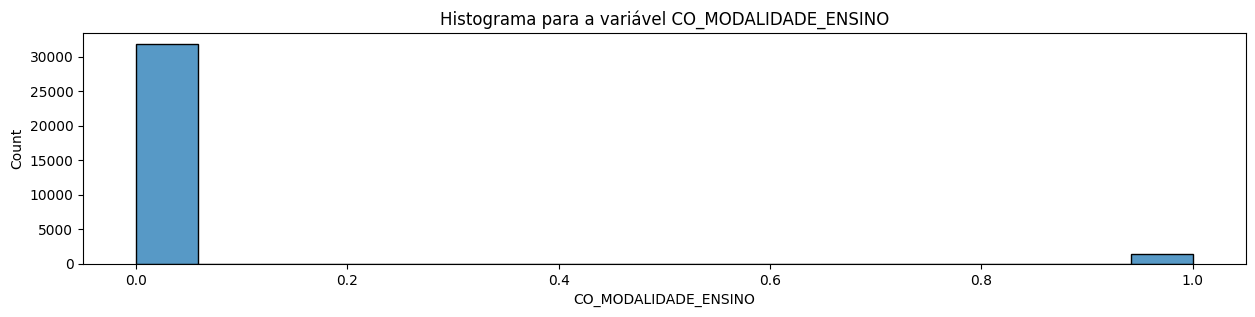

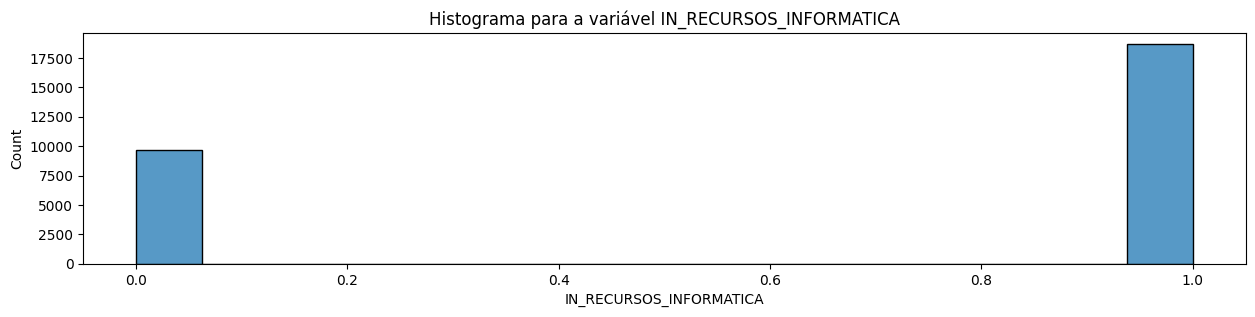

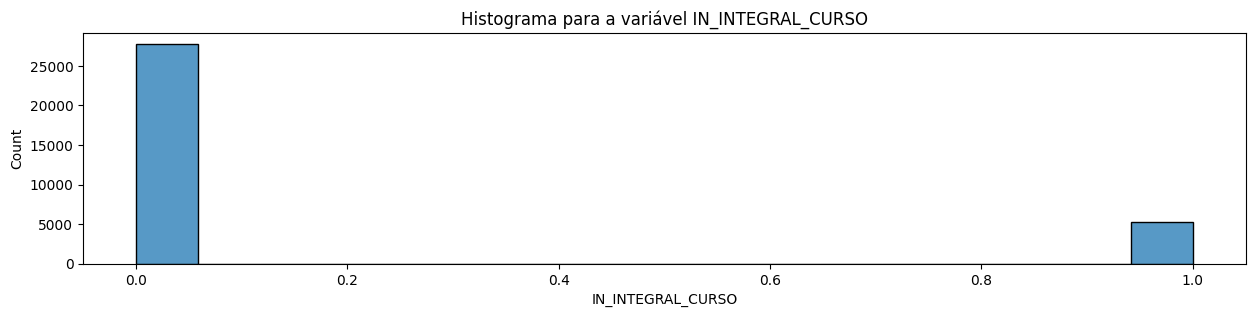

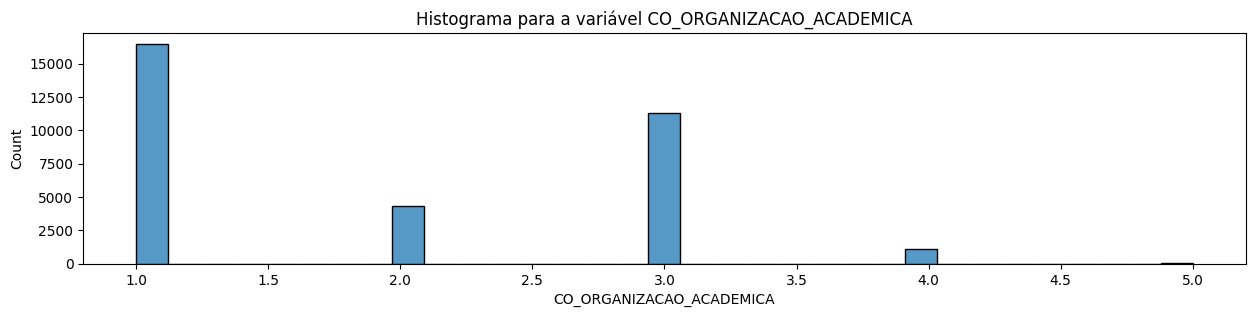

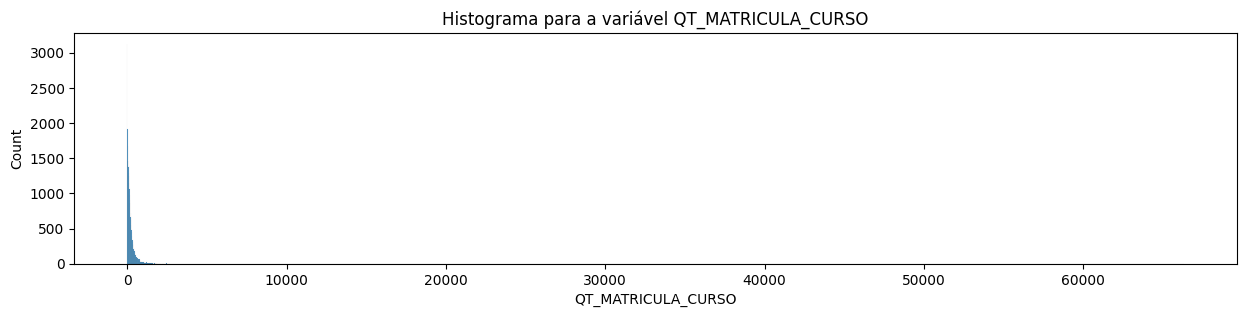

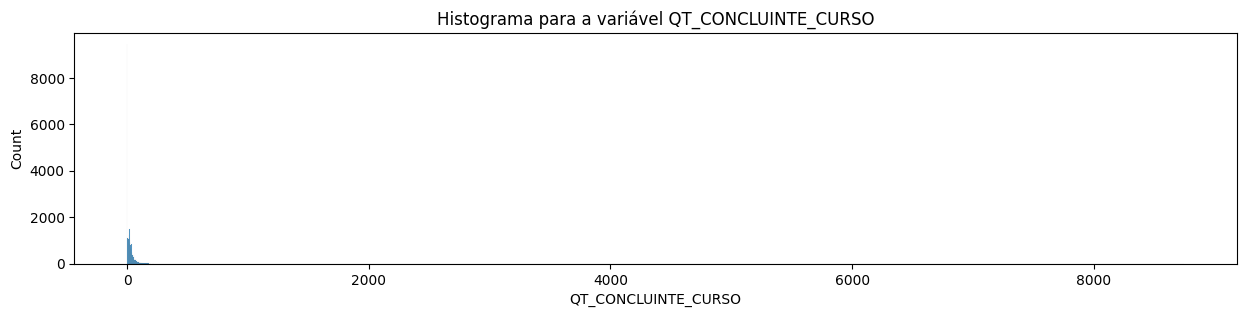

In [130]:
for c in cursos.columns:
  sns.histplot(cursos[c])
  plt.title('Histograma para a variável' + ' ' +  str(c))
  plt.show()

In [97]:
cursos.describe()


,CO_MODALIDADE_ENSINO,IN_RECURSOS_INFORMATICA,IN_INTEGRAL_CURSO,CO_ORGANIZACAO_ACADEMICA,QT_MATRICULA_CURSO,QT_CONCLUINTE_CURSO
count,33273.000000,28422.000000,33077.000000,33273.000000,33273.000000,33012.000000
mean,0.041114,0.658574,0.159386,1.914916,235.619421,31.216527
std,0.198558,0.474196,0.366041,0.986537,814.924491,122.313143
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,49.000000,1.000000
50%,0.000000,1.000000,0.000000,2.000000,126.000000,15.000000
75%,0.000000,1.000000,0.000000,3.000000,256.000000,35.000000
max,1.000000,1.000000,1.000000,5.000000,66320.000000,8748.000000


É possível notar que QT_MATRICULA_CURSO e QT_CONCLUINTE_CURSO possuem outliers através da observação de que a cauda do histograma para estas variáveis está muito comprida para a direita e de que o terceiro quartil difere muito do valor máximo no describe(). Vamos aprofundar esta análise de outliers a seguir.

In [98]:
# Parece haver muitos outliers na quantidade de concluintes e matriculados

CONCLUINTES = 'QT_CONCLUINTE_CURSO'

print("Análise de outliers para alunos concluintes")
print("\n")
quantiles = [80,85,90,95,99]

for q in quantiles:

  print(f"O {q}ésimo percentil é: {np.percentile(curso[CONCLUINTES].dropna(), q)}")
  print("\n")
  print("____________________________________")

Análise de outliers para alunos concluintes


O 80ésimo percentil é: 42.0


____________________________________
O 85ésimo percentil é: 51.0


____________________________________
O 90ésimo percentil é: 67.0


____________________________________
O 95ésimo percentil é: 98.0


____________________________________
O 99ésimo percentil é: 224.88999999999942


____________________________________


In [99]:
MATRICULADOS = 'QT_MATRICULA_CURSO'

print("Análise de outliers para alunos matriculados")
print("\n")
quantiles = [80,85,90,95,99]

for q in quantiles:

  print(f"O {q}ésimo percentil é: {np.percentile(curso[MATRICULADOS].dropna(), q)}")
  print("\n")
  print("____________________________________")

Análise de outliers para alunos matriculados


O 80ésimo percentil é: 306.0


____________________________________
O 85ésimo percentil é: 374.0


____________________________________
O 90ésimo percentil é: 479.0


____________________________________
O 95ésimo percentil é: 702.3999999999978


____________________________________
O 99ésimo percentil é: 1593.8399999999965


____________________________________


In [100]:
# Vamos filtrar o dataframe para excluir nans e outliers (considerando como linha de corte o 95 quartil (cujo valor é 98/703) pela análise acima)

cursos2 = cursos.dropna()
cursos2 = cursos2[cursos2[CONCLUINTES] <= 98]
cursos2 = cursos2[cursos2[MATRICULADOS] <= 703]

In [101]:
vars = ['CO_MODALIDADE_ENSINO',            # Modalidade de ensino: 1: presencial / 0: distância
             'IN_RECURSOS_INFORMATICA',    # Instituição disponibiliza recursos de informática? 0: não / 1: sim
             'IN_INTEGRAL_CURSO',          # Se o curso é integral - 0: não / 1: sim
             'QT_MATRICULA_CURSO',         # Quantidade de matriculas no curso
             'QT_CONCLUINTE_CURSO']        # Quantidade de concluintes

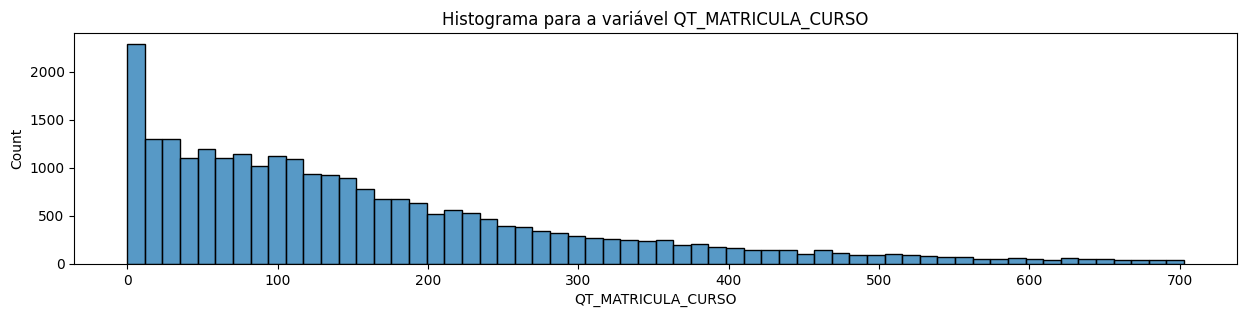

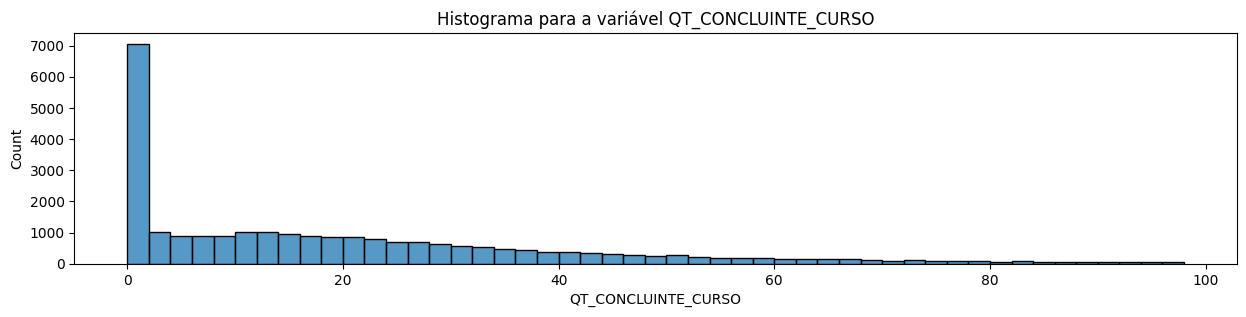

In [108]:
# Apenas para comparar com os dados antes da limpeza, vamos plotar novamente os histogramas das duas últimas variáveis, que estavam muito difusos:

for c in cursos2.columns[-2:]:
  sns.histplot(cursos2[c])
  plt.title('Histograma para a variável' + ' ' +  str(c))
  plt.show()

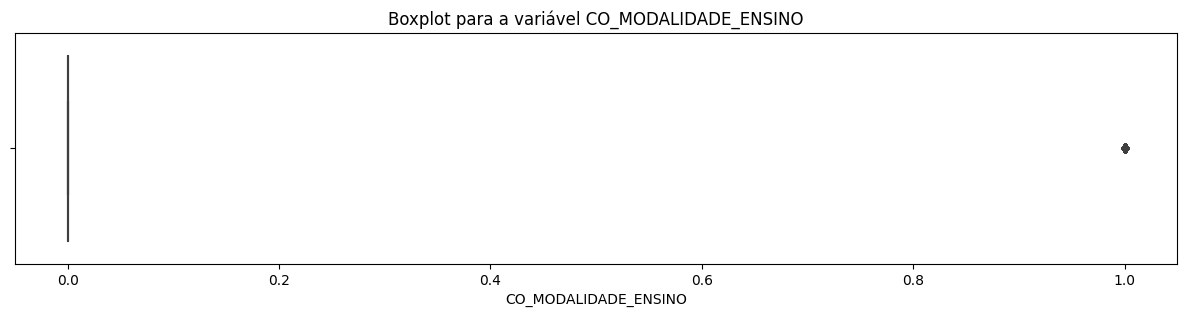

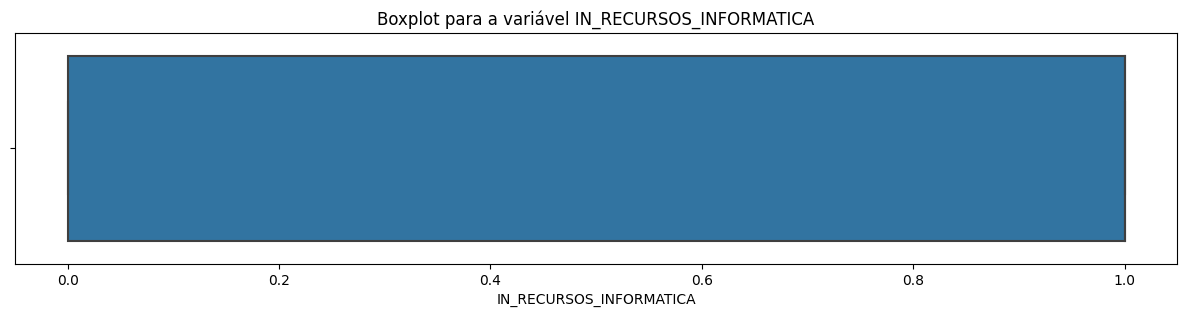

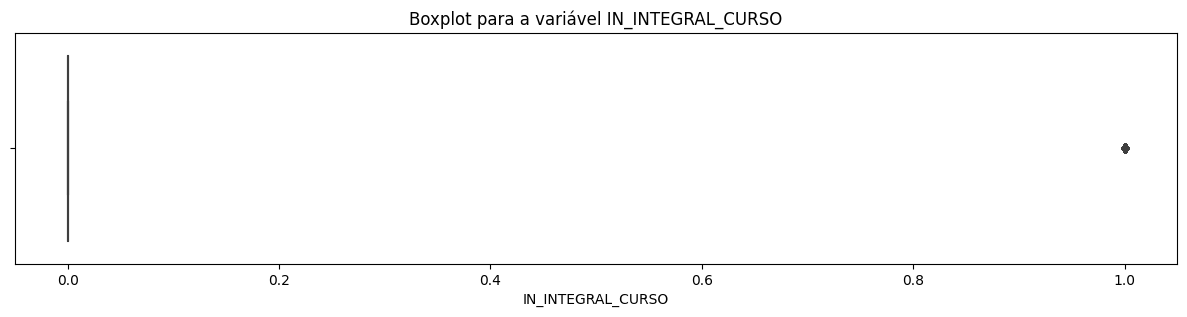

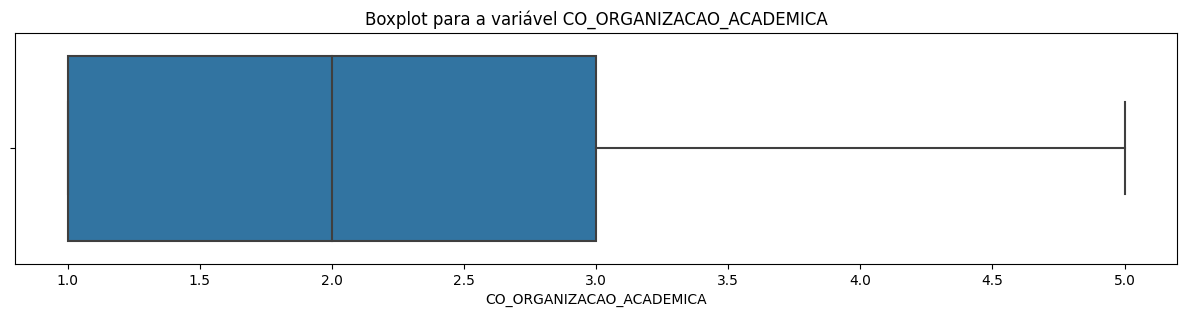

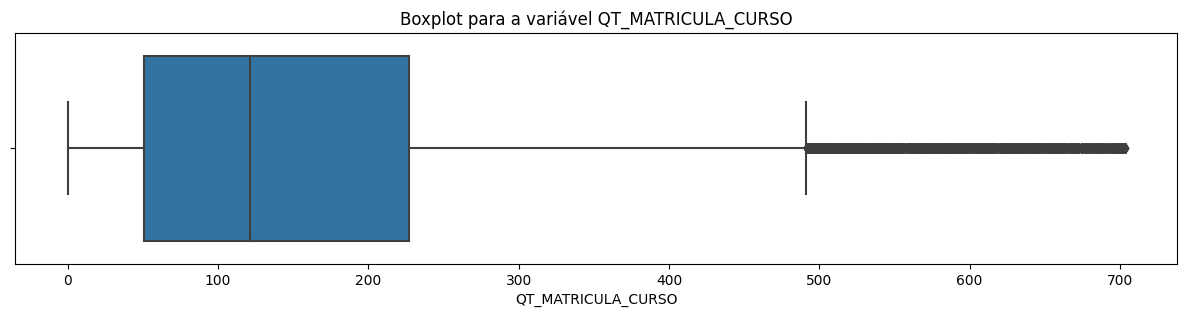

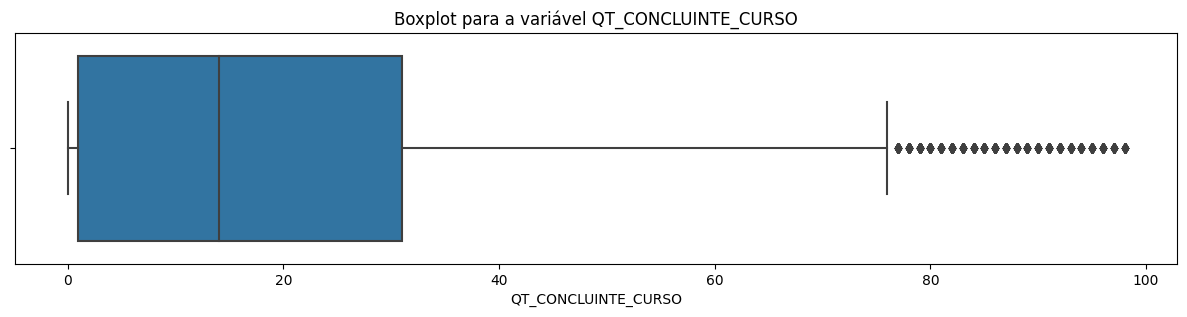

In [132]:
# Boxplot para as variáveis

for c in cursos2.columns:
  sns.boxplot(x= cursos2[c])
  plt.title('Boxplot para a variável' + ' ' +  str(c))
  plt.show()

<AxesSubplot: >

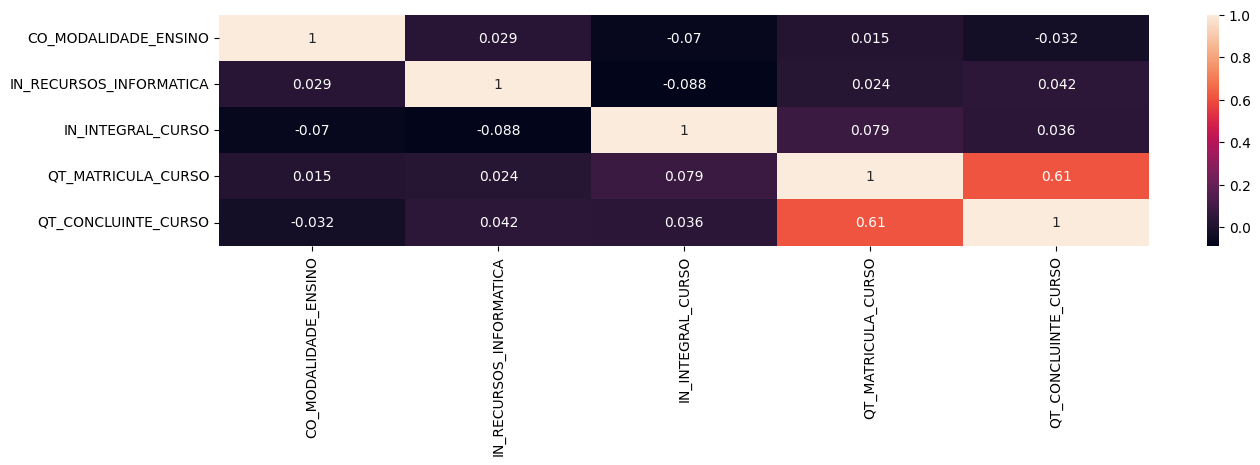

In [104]:
# Análise de correlação

sns.heatmap(cursos2[vars].corr(), annot = True)

Não há nenhuma correlação significativa entre as variáveis independentes selecionadas, exceto pela quantidade de matrículas. Porém esta variável não traz informação adicional relevante sobre o motivo potencial de alunos não estarem concluindo seus cursos.

In [109]:
# Aqui voltamos a usar os dados originais, antes da limpeza, para avaliar as outras questões sem interferências:

presencial = cursos[cursos['CO_MODALIDADE_ENSINO'] == 1]['CO_MODALIDADE_ENSINO'].count()

distancia = cursos[cursos['CO_MODALIDADE_ENSINO'] == 0]['CO_MODALIDADE_ENSINO'].count()

total = cursos[(cursos['CO_MODALIDADE_ENSINO'] == 0) | (cursos['CO_MODALIDADE_ENSINO'] == 1)]['CO_MODALIDADE_ENSINO'].count()

In [111]:
print(f"O percentual de alunos matriculados na modalidade presencial é de {math.ceil(100*presencial/total)}%")
print(f"O percentual de alunos matriculados na modalidade à distância é de {math.floor(100*distancia/total)}%")

O percentual de alunos matriculados na modalidade presencial é de 5%
O percentual de alunos matriculados na modalidade à distância é de 95%


<AxesSubplot: xlabel='CO_ORGANIZACAO_ACADEMICA', ylabel='QT_MATRICULA_CURSO'>

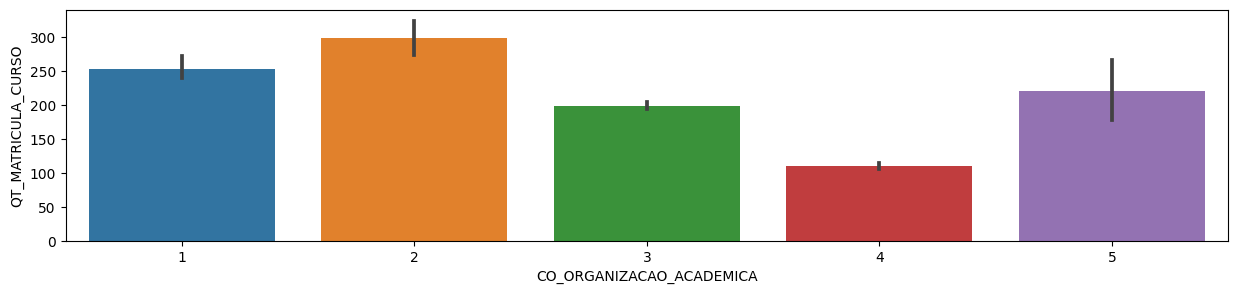

In [113]:
sns.barplot(data = cursos, x = 'CO_ORGANIZACAO_ACADEMICA', y = MATRICULADOS)

Do dicionário de dados temos que:
1. Universidade
2. Centro Universitário
3. Faculdade
4. Instituto Federal de
Educação, Ciência e
Tecnologia
5. Centro Federal de Educação
Tecnológica

Portanto o maior número de matrículas está nos Centros Universitários.

---
--- 
### Reanálise das hipóteses levantadas


    1. É possível encontrar algum fator que se correlacione com a quantidade de concluintes do curso?;
    
  Não possível encontrar alguma variável com elevada correlação com a quantidade de concluintes dos cursos, exceto pelo número de matrículas, mas isto não revela nenhum insight importante. Possibilidades de melhorias: escolher o método de Spearman de correlação e refazer para as variáveis selecionadas, dado que este é capaz de capturar relações não monotônicas entre as variáveis e realizar nova seleção de atributos caso se mostre necessário.

    2. Qual tipo de modalidade de ensino (Presencial ou à distância) é mais comum?

  Em 2014 a modalidade presencial era muito mais prevalente do que a modalidade à distância: 95% versus 5%. Como complemento à esta análise seria interessante verificar o quanto este percentual mudou no pós pandemia, em que a modalidade à distância tornou-se bem mais prevalente.

    3. Quais tipos de organização acadêmica tem mais matrículas?

Centros Universitários. Para complementar esta análise poderíamos estratificar essas matrículas por Estado, bem como comparar com valores mais atuais (2022, por exemplo) para entendermos como fatores geográficos e temporais, respectivamente, podem estar afetando.